# Handling Imbalanced data class by krishnaik:

In [31]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [32]:
df=pd.read_csv("D:\\data\\creditcard.csv")
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [33]:
df.shape

(284807, 31)

In [34]:
df['Class'].unique()#fraud or not

array([0, 1], dtype=int64)

In [35]:
df['Class'].value_counts()# huge difference

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
pd.value_counts(df['Class']).plot.bar()

In [36]:
X=df.drop('Class',axis=1)
y=df['Class']

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import KFold,GridSearchCV
import numpy as np

In [38]:
### Cross validation like KFOLD and Hyperparameter Tuning

In [39]:
log_class=LogisticRegression()
grid={'C': 10.0**np.arange(-2,3),
     'penalty':['l1','l2'],
     }
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [40]:
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=1,scoring='f1_macro')


In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=.2)

In [42]:
y_train.value_counts()

0    227454
1       391
Name: Class, dtype: int64

In [43]:
clf.fit(X_train,y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.8267558         nan 0.84448018        nan 0.83830415
        nan 0.84355096        nan 0.83908662]
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [44]:
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[56837    24]
 [   40    61]]
0.9988764439450862
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.72      0.60      0.66       101

    accuracy                           1.00     56962
   macro avg       0.86      0.80      0.83     56962
weighted avg       1.00      1.00      1.00     56962



<AxesSubplot:>

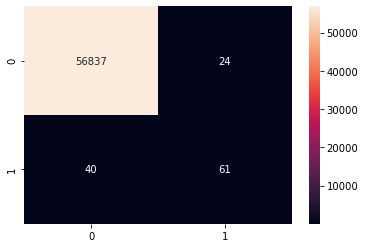

In [45]:
import seaborn as sn
sn.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')

In [46]:
class_weight={0:1,1:100}

In [47]:
from sklearn.ensemble import RandomForestClassifier # This is the best method (check f1 score of 1's)

clf=RandomForestClassifier(class_weight=class_weight)
clf.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 100})

In [48]:
y_pred_clf=clf.predict(X_test)

In [49]:
print(confusion_matrix(y_test,y_pred_clf))
print(accuracy_score(y_test,y_pred_clf))
print(classification_report(y_test,y_pred_clf))

[[56857     4]
 [   20    81]]
0.9995786664794073
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.95      0.80      0.87       101

    accuracy                           1.00     56962
   macro avg       0.98      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



# undersampling:never use this untill the dataset is less

In [50]:
y_train.value_counts()

0    227454
1       391
Name: Class, dtype: int64

In [51]:
from imblearn.under_sampling import NearMiss
from collections import Counter

In [52]:
ns=NearMiss(.8)
X_train_ns,y_train_ns=ns.fit_resample(X_train,y_train)
print('number of sample before fit:{}'.format(Counter(y_train)))
print('number of sample after fit:{}'.format(Counter(y_train_ns)))



C:\Users\LENOVO\anaconda3\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


number of sample before fit:Counter({0: 227454, 1: 391})
number of sample after fit:Counter({0: 488, 1: 391})


In [53]:
488*80/100

390.4

In [54]:
391/.8

488.75

In [55]:
from sklearn.ensemble import RandomForestClassifier # This is the best method (check f1 score of 1's)

clf=RandomForestClassifier()
clf.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [56]:
y_pred_ns=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred_ns))
print(accuracy_score(y_test,y_pred_ns))
print(classification_report(y_test,y_pred_ns))

[[40335 16526]
 [    4    97]]
0.7098065376917946
              precision    recall  f1-score   support

           0       1.00      0.71      0.83     56861
           1       0.01      0.96      0.01       101

    accuracy                           0.71     56962
   macro avg       0.50      0.83      0.42     56962
weighted avg       1.00      0.71      0.83     56962



# Oversampling

In [57]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [58]:
os=RandomOverSampler(.75)

X_train_os,y_train_os=os.fit_resample(X_train,y_train)
print('number of sample before fit:{}'.format(Counter(y_train)))
print('number of sample after fit:{}'.format(Counter(y_train_os)))

C:\Users\LENOVO\anaconda3\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


number of sample before fit:Counter({0: 227454, 1: 391})
number of sample after fit:Counter({0: 227454, 1: 170590})


In [59]:
227454*.75

170590.5

In [60]:
from sklearn.ensemble import RandomForestClassifier # This is the best method (check f1 score of 1's)

clf=RandomForestClassifier()
clf.fit(X_train_os,y_train_os)

RandomForestClassifier()

In [61]:
y_pred_os=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred_os))
print(accuracy_score(y_test,y_pred_os))
print(classification_report(y_test,y_pred_os))

[[56855     6]
 [   18    83]]
0.9995786664794073
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.93      0.82      0.87       101

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



# SMOTE

In [62]:
from imblearn.combine import SMOTETomek

In [63]:
smt=SMOTETomek(.5)

X_train_os,y_train_os=os.fit_resample(X_train,y_train)
print('number of sample before fit:{}'.format(Counter(y_train)))
print('number of sample after fit:{}'.format(Counter(y_train_os)))#more new number of data create



C:\Users\LENOVO\anaconda3\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


number of sample before fit:Counter({0: 227454, 1: 391})
number of sample after fit:Counter({0: 227454, 1: 170590})


In [64]:
from sklearn.ensemble import RandomForestClassifier # This is the best method (check f1 score of 1's)

clf=RandomForestClassifier()
clf.fit(X_train_os,y_train_os)
y_pred_os=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred_os))
print(accuracy_score(y_test,y_pred_os))
print(classification_report(y_test,y_pred_os))

[[56854     7]
 [   19    82]]
0.9995435553526912
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.92      0.81      0.86       101

    accuracy                           1.00     56962
   macro avg       0.96      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962



# Ensemble technique

In [66]:

from imblearn.ensemble import EasyEnsembleClassifier

In [ ]:
easy=EasyEnsembleClassifier()
easy.fit(X_train,y_train)

In [72]:
y_pred_easy=easy.predict(X_test)
print(confusion_matrix(y_test,y_pred_easy))
print(accuracy_score(y_test,y_pred_easy))
print(classification_report(y_test,y_pred_easy))

[[56861     0]
 [  101     0]]
0.9982268881008391
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.00      0.00      0.00       101

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
